<a href="https://colab.research.google.com/github/jyothign0/Deep-Learning/blob/main/CompareANNandCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
mnist=tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


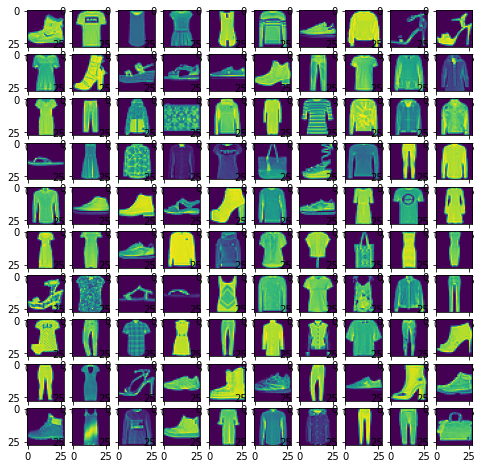

In [4]:
plt.figure(figsize=(8,8))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(x_train[i])

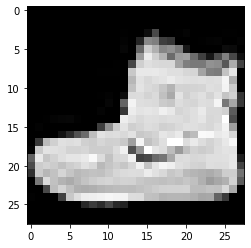

In [5]:
plt.imshow(x_train[0],cmap='gray')

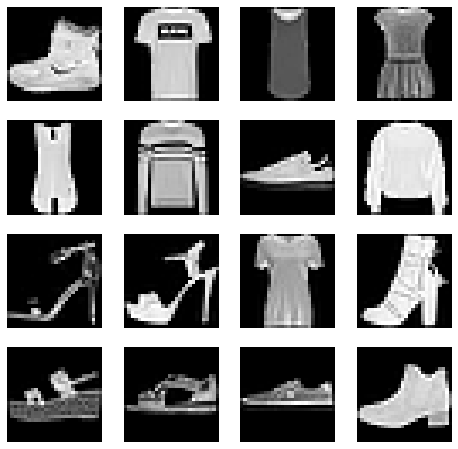

In [6]:
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.axis('off')
  plt.imshow(x_train[i].reshape(28,28),cmap='gray')

In [14]:
classes=['T Shirt','Trouser', 'Pullover', 'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [9]:
#np.argmax(y_test[:10],axis=1)

In [11]:
#predictions=model.predict(x_test[:9])
#predictions
#np.argmax(predictions,axis=1)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [15]:
def predict_class(image):
  accessory=classes[np.argmax(model.predict(image))]
  print('the image is an',accessory)
  plt.imshow(image.reshape(28,28),cmap='gray')
predict_class(x_test[:1])

NameError: ignored

In [16]:
np.set_printoptions(linewidth = 150)
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

9


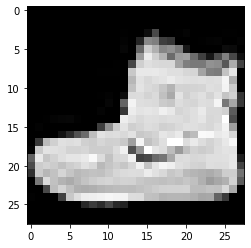

In [17]:
plt.imshow(x_train[0],cmap = 'gray')
print(y_train[0])

In [18]:
x_train = x_train.reshape([60000, 28, 28, 1])
x_test = x_test.reshape([10000, 28, 28, 1])
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [19]:
#Data Augmentation on Images
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False
)
train_datagen.fit(x_train)
val_datagen = ImageDataGenerator(rescale = 1/255)
val_datagen.fit(x_test)

In [20]:
#Flatten layer is required for vectors
ANN_model = tf.keras.Sequential([
                  tf.keras.layers.Flatten(input_shape = (28,28,1)),
                   tf.keras.layers.Dense(1024, activation = 'relu'),
                  tf.keras.layers.Dense(512, activation = 'relu'),
                  tf.keras.layers.Dense(256, activation = 'relu'),
                  tf.keras.layers.Dense(128, activation = 'relu'),
                  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [21]:
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,494,154
Trainable params: 1,494,154
Non-

In [22]:
from tensorflow.keras.optimizers import SGD
ANN_model.compile(optimizer = SGD(lr = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [23]:
history = ANN_model.fit(
    train_datagen.flow(x_train,y_train, batch_size = 128),
    validation_data = val_datagen.flow(x_test, y_test, batch_size = 128),
    epochs = 30,
    verbose = 1
)

Epoch 1/30
469/469 [==============================] - 28s 54ms/step - loss: 2.1111 - accuracy: 0.3061 - val_loss: 1.8731 - val_accuracy: 0.4467
Epoch 2/30
469/469 [==============================] - 26s 54ms/step - loss: 1.7416 - accuracy: 0.5069 - val_loss: 1.4498 - val_accuracy: 0.5729
Epoch 3/30
469/469 [==============================] - 25s 54ms/step - loss: 1.4102 - accuracy: 0.5712 - val_loss: 1.1742 - val_accuracy: 0.6091
Epoch 4/30
469/469 [==============================] - 25s 54ms/step - loss: 1.2125 - accuracy: 0.5931 - val_loss: 1.0354 - val_accuracy: 0.6226
Epoch 5/30
469/469 [==============================] - 25s 53ms/step - loss: 1.1032 - accuracy: 0.6107 - val_loss: 0.9604 - val_accuracy: 0.6399
Epoch 6/30
469/469 [==============================] - 25s 54ms/step - loss: 1.0367 - accuracy: 0.6256 - val_loss: 0.9104 - val_accuracy: 0.6590
Epoch 7/30
469/469 [==============================] - 25s 54ms/step - loss: 0.9891 - accuracy: 0.6395 - val_loss: 0.8769 - val_accuracy:

In [25]:
CNN_model=tf.keras.models.Sequential([
                  tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu', input_shape=(28,28,1)),
                  tf.keras.layers.MaxPool2D(2,2),
                  tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
                  tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
                  tf.keras.layers.MaxPool2D(2,2),
                  tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
                  tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
                  tf.keras.layers.MaxPool2D(2,2),
                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dense(128, activation = 'relu'),
                  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [26]:
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)        

In [27]:
from tensorflow.keras.optimizers import SGD
CNN_model.compile(optimizer = SGD(lr = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [28]:
history1 = CNN_model.fit(
    train_datagen.flow(x_train,y_train, batch_size = 128),
    validation_data = val_datagen.flow(x_test, y_test, batch_size = 128),
    epochs = 30,
    verbose = 1
)

Epoch 1/30
469/469 [==============================] - 60s 68ms/step - loss: 2.2921 - accuracy: 0.1257 - val_loss: 2.2827 - val_accuracy: 0.1701
Epoch 2/30
469/469 [==============================] - 31s 66ms/step - loss: 2.2744 - accuracy: 0.1772 - val_loss: 2.2566 - val_accuracy: 0.1944
Epoch 3/30
469/469 [==============================] - 30s 65ms/step - loss: 2.2386 - accuracy: 0.2058 - val_loss: 2.1948 - val_accuracy: 0.2529
Epoch 4/30
469/469 [==============================] - 32s 69ms/step - loss: 2.1311 - accuracy: 0.2603 - val_loss: 1.9619 - val_accuracy: 0.3131
Epoch 5/30
469/469 [==============================] - 31s 66ms/step - loss: 1.6487 - accuracy: 0.4431 - val_loss: 1.1422 - val_accuracy: 0.6079
Epoch 6/30
469/469 [==============================] - 31s 65ms/step - loss: 1.1116 - accuracy: 0.5927 - val_loss: 0.9311 - val_accuracy: 0.6610
Epoch 7/30
469/469 [==============================] - 32s 68ms/step - loss: 0.9874 - accuracy: 0.6300 - val_loss: 0.8537 - val_accuracy:

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

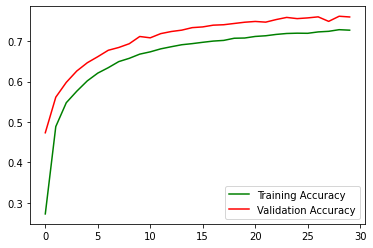

In [ ]:
plt.figure()
plt.plot(acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.legend()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

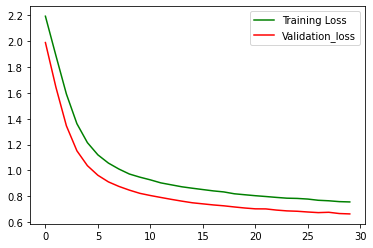

In [ ]:
plt.figure()
plt.plot(loss, color = 'green', label = 'Training Loss')
plt.plot(val_loss, color = 'red', label = 'Validation_loss')
plt.legend()

In [ ]:
np.argmax(y_test[:9],axis=1)

In [ ]:
predictions=model.predict(x_test[:9])
predictions

In [ ]:
np.argmax(predictions,axis=1)